In [1]:
#ML Framework Stuff:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Image Import Commands: 
import os, sys
from IPython.display import display
from IPython.display import Image as _Imgdis
from PIL import Image

In [2]:
#How much patient data do we have? 
folder = "./testicular_cancer/"
onlyfiles = [f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f))]
print("Working with {0} Files".format(len(onlyfiles)))

Working with 123 Files


In [3]:
#Explore one data entry
data = pd.read_csv(folder + onlyfiles[1], sep="\t",header=None)
data.columns = ["Protein", "Protein_Expression"]
data.head()

,Protein,Protein_Expression
0,Sample REF,027D22A3-FA13-4BAE-A6BB-476DE1F79836
1,Composite Element REF,Protein Expression
2,14-3-3_beta-R-V,-0.09826602075
3,14-3-3_epsilon-M-C,0.21928706725
4,14-3-3_zeta-R-V,0.17231290575


In [4]:
counter = 0
for names in onlyfiles: 
    if names == '.DS_Store':
        print("bad")
    else: 
        new_data = pd.read_csv(folder + names, sep="\t",header=None)
        new_data.columns = ["Protein", "Protein_Expression"]
        data= data.merge(new_data,left_on='Protein',right_on="Protein")
    counter = counter +1   

print(str(counter))
print("The shape of the data frame is: " + str(data.shape))

bad
123
The shape of the data frame is: (220, 124)


In [5]:
data = data.drop(1,axis=0)
data = data.T
data.head()

,0,2,3,4,5,6,7,8,9,10,...,210,211,212,213,214,215,216,217,218,219
Protein,Sample REF,14-3-3_beta-R-V,14-3-3_epsilon-M-C,14-3-3_zeta-R-V,4E-BP1-R-V,4E-BP1_pS65-R-V,4E-BP1_pT37_T46-R-V,4E-BP1_pT70-R-V,53BP1-R-E,A-Raf_pS299-R-C,...,Chk1_pS296-R-V,COG3-R-V,DUSP4-R-V,ERCC5-R-C,IGF1R_pY1135_Y1136-R-V,IRF-1-R-C,Jak2-R-V,p16_INK4a-R-V,SHP-2_pY542-R-C,CDK1_pY15-R-C
Protein_Expression_x,027D22A3-FA13-4BAE-A6BB-476DE1F79836,-0.09826602075,0.21928706725,0.17231290575,0.13939115525,0.14927421725,0.34855875925,-0.00203256375000005,-0.12448953825,-0.10790764425,...,-0.09925312725,0.07781126475,-0.24677301475,0.0865360372499999,-0.14182040175,0.25063490475,0.47252263175,-0.26289499425,-0.21521300825,-0.35232106475
Protein_Expression_y,027D22A3-FA13-4BAE-A6BB-476DE1F79836,-0.09826602075,0.21928706725,0.17231290575,0.13939115525,0.14927421725,0.34855875925,-0.00203256375000005,-0.12448953825,-0.10790764425,...,-0.09925312725,0.07781126475,-0.24677301475,0.0865360372499999,-0.14182040175,0.25063490475,0.47252263175,-0.26289499425,-0.21521300825,-0.35232106475
Protein_Expression_x,044D0CB8-2F15-42AB-9CFC-2BCC918CE4D0,-0.0607450357500001,-0.10418710575,-0.0692476002499999,-0.66888829375,-0.31116245875,-0.11998702675,-0.20017954375,-0.21685882125,0.0270766247500001,...,-0.06409499925,-0.02929833125,-0.32691142175,0.10976865025,0.16291171025,-0.08356639225,-0.23910209125,0.47783645875,0.22743716675,-0.43563692375
Protein_Expression_y,0476AADE-DB39-4507-B3CA-D2B3991C1EAF,0.10141270025,-0.03490767775,0.05237900175,-0.31303576375,0.14739165125,0.41021896925,0.0938120312499999,0.16815200775,-0.0987249252499999,...,-0.09149730525,0.11580303375,0.0997479482499995,-0.01485904475,0.09265968825,-0.12077305325,0.12746740575,-0.0454944292499999,0.48208536075,0.14425330325


In [6]:
protein_annotations = pd.read_csv("./metadata/testicular/mdanderson.org_TGCT.MDA_RPPA_Core.antibody_annotation.txt", sep="\t",header=None)
protein_annotations = protein_annotations.drop(protein_annotations.columns[[1,3,4,5,6,7,8]],axis = 1)
protein_annotations = protein_annotations.T
protein_annotations.head()

,0,1,2,3,4,5,6,7,8,9,...,209,210,211,212,213,214,215,216,217,218
0,Gene Name,YWHAB,YWHAE,YWHAZ,EIF4EBP1,EIF4EBP1,EIF4EBP1,EIF4EBP1,TP53BP1,ARAF,...,CHEK1,COG3,GUSP4,ERCC5,IGFR1,IRF1,JAK2,CDKN2A,PTPN11,CDK1
2,Sample REF,14-3-3_beta-R-V,14-3-3_epsilon-M-C,14-3-3_zeta-R-V,4E-BP1-R-V,4E-BP1_pS65-R-V,4E-BP1_pT37_T46-R-V,4E-BP1_pT70-R-V,53BP1-R-E,A-Raf_pS299-R-C,...,Chk1_pS296-R-V,COG3-R-V,DUSP4-R-V,ERCC5-R-C,IGF1R_pY1135_Y1136-R-V,IRF-1-R-C,Jak2-R-V,p16_INK4a-R-V,SHP-2_pY542-R-C,CDK1_pY15-R-C


In [7]:
data_with_genes =  pd.merge(protein_annotations.T, data.T, left_on=2, right_on='Protein')
data_with_genes = data_with_genes.T
data_with_genes = data_with_genes.drop("Protein", axis=0)
data_with_genes.head()

,0,1,2,3,4,5,6,7,8,9,...,209,210,211,212,213,214,215,216,217,218
0,Gene Name,YWHAB,YWHAE,YWHAZ,EIF4EBP1,EIF4EBP1,EIF4EBP1,EIF4EBP1,TP53BP1,ARAF,...,CHEK1,COG3,GUSP4,ERCC5,IGFR1,IRF1,JAK2,CDKN2A,PTPN11,CDK1
2,Sample REF,14-3-3_beta-R-V,14-3-3_epsilon-M-C,14-3-3_zeta-R-V,4E-BP1-R-V,4E-BP1_pS65-R-V,4E-BP1_pT37_T46-R-V,4E-BP1_pT70-R-V,53BP1-R-E,A-Raf_pS299-R-C,...,Chk1_pS296-R-V,COG3-R-V,DUSP4-R-V,ERCC5-R-C,IGF1R_pY1135_Y1136-R-V,IRF-1-R-C,Jak2-R-V,p16_INK4a-R-V,SHP-2_pY542-R-C,CDK1_pY15-R-C
Protein_Expression_x,027D22A3-FA13-4BAE-A6BB-476DE1F79836,-0.09826602075,0.21928706725,0.17231290575,0.13939115525,0.14927421725,0.34855875925,-0.00203256375000005,-0.12448953825,-0.10790764425,...,-0.09925312725,0.07781126475,-0.24677301475,0.0865360372499999,-0.14182040175,0.25063490475,0.47252263175,-0.26289499425,-0.21521300825,-0.35232106475
Protein_Expression_y,027D22A3-FA13-4BAE-A6BB-476DE1F79836,-0.09826602075,0.21928706725,0.17231290575,0.13939115525,0.14927421725,0.34855875925,-0.00203256375000005,-0.12448953825,-0.10790764425,...,-0.09925312725,0.07781126475,-0.24677301475,0.0865360372499999,-0.14182040175,0.25063490475,0.47252263175,-0.26289499425,-0.21521300825,-0.35232106475
Protein_Expression_x,044D0CB8-2F15-42AB-9CFC-2BCC918CE4D0,-0.0607450357500001,-0.10418710575,-0.0692476002499999,-0.66888829375,-0.31116245875,-0.11998702675,-0.20017954375,-0.21685882125,0.0270766247500001,...,-0.06409499925,-0.02929833125,-0.32691142175,0.10976865025,0.16291171025,-0.08356639225,-0.23910209125,0.47783645875,0.22743716675,-0.43563692375


In [8]:
TCGA_Annot = pd.read_csv("./metadata/testicular/mdanderson.org_TGCT.MDA_RPPA_Core.sdrf.txt",
                                  sep="\t",header=None)
TCGA_Annot = TCGA_Annot[[4,9]]
TCGA_Annot.head()

,4,9
0,Sample Name,Extract Name
1,5E0F8A2B-9723-474A-B388-0A64B130DB56,TCGA-XY-A9T9-01A-21-A45P-20.P
2,98BF5B14-7CE7-4E13-BFAA-104572685026,TCGA-XE-A9SE-01A-11-A45P-20.P
3,8329F212-4A68-483B-875D-6C49BB6B3E58,TCGA-YU-AA61-01A-21-A45P-20.P
4,1ABE66AA-9002-4532-A902-2DA198405BC3,TCGA-SN-A84X-01A-21-A45P-20.P


In [9]:
data_with_genes.head()

,0,1,2,3,4,5,6,7,8,9,...,209,210,211,212,213,214,215,216,217,218
0,Gene Name,YWHAB,YWHAE,YWHAZ,EIF4EBP1,EIF4EBP1,EIF4EBP1,EIF4EBP1,TP53BP1,ARAF,...,CHEK1,COG3,GUSP4,ERCC5,IGFR1,IRF1,JAK2,CDKN2A,PTPN11,CDK1
2,Sample REF,14-3-3_beta-R-V,14-3-3_epsilon-M-C,14-3-3_zeta-R-V,4E-BP1-R-V,4E-BP1_pS65-R-V,4E-BP1_pT37_T46-R-V,4E-BP1_pT70-R-V,53BP1-R-E,A-Raf_pS299-R-C,...,Chk1_pS296-R-V,COG3-R-V,DUSP4-R-V,ERCC5-R-C,IGF1R_pY1135_Y1136-R-V,IRF-1-R-C,Jak2-R-V,p16_INK4a-R-V,SHP-2_pY542-R-C,CDK1_pY15-R-C
Protein_Expression_x,027D22A3-FA13-4BAE-A6BB-476DE1F79836,-0.09826602075,0.21928706725,0.17231290575,0.13939115525,0.14927421725,0.34855875925,-0.00203256375000005,-0.12448953825,-0.10790764425,...,-0.09925312725,0.07781126475,-0.24677301475,0.0865360372499999,-0.14182040175,0.25063490475,0.47252263175,-0.26289499425,-0.21521300825,-0.35232106475
Protein_Expression_y,027D22A3-FA13-4BAE-A6BB-476DE1F79836,-0.09826602075,0.21928706725,0.17231290575,0.13939115525,0.14927421725,0.34855875925,-0.00203256375000005,-0.12448953825,-0.10790764425,...,-0.09925312725,0.07781126475,-0.24677301475,0.0865360372499999,-0.14182040175,0.25063490475,0.47252263175,-0.26289499425,-0.21521300825,-0.35232106475
Protein_Expression_x,044D0CB8-2F15-42AB-9CFC-2BCC918CE4D0,-0.0607450357500001,-0.10418710575,-0.0692476002499999,-0.66888829375,-0.31116245875,-0.11998702675,-0.20017954375,-0.21685882125,0.0270766247500001,...,-0.06409499925,-0.02929833125,-0.32691142175,0.10976865025,0.16291171025,-0.08356639225,-0.23910209125,0.47783645875,0.22743716675,-0.43563692375


In [10]:
data_genes_TCGA =  pd.merge(data_with_genes,TCGA_Annot , left_on=0, right_on=4,how='left')
data_genes_TCGA = data_genes_TCGA.drop_duplicates()
data_genes_TCGA.head()

,0,1,2,3,4_x,5,6,7,8,9_x,...,211,212,213,214,215,216,217,218,4_y,9_y
0,Gene Name,YWHAB,YWHAE,YWHAZ,EIF4EBP1,EIF4EBP1,EIF4EBP1,EIF4EBP1,TP53BP1,ARAF,...,GUSP4,ERCC5,IGFR1,IRF1,JAK2,CDKN2A,PTPN11,CDK1,NaN,NaN
1,Sample REF,14-3-3_beta-R-V,14-3-3_epsilon-M-C,14-3-3_zeta-R-V,4E-BP1-R-V,4E-BP1_pS65-R-V,4E-BP1_pT37_T46-R-V,4E-BP1_pT70-R-V,53BP1-R-E,A-Raf_pS299-R-C,...,DUSP4-R-V,ERCC5-R-C,IGF1R_pY1135_Y1136-R-V,IRF-1-R-C,Jak2-R-V,p16_INK4a-R-V,SHP-2_pY542-R-C,CDK1_pY15-R-C,NaN,NaN
2,027D22A3-FA13-4BAE-A6BB-476DE1F79836,-0.09826602075,0.21928706725,0.17231290575,0.13939115525,0.14927421725,0.34855875925,-0.00203256375000005,-0.12448953825,-0.10790764425,...,-0.24677301475,0.0865360372499999,-0.14182040175,0.25063490475,0.47252263175,-0.26289499425,-0.21521300825,-0.35232106475,027D22A3-FA13-4BAE-A6BB-476DE1F79836,TCGA-2G-AAHC-01A-21-A45Q-20.P
438,044D0CB8-2F15-42AB-9CFC-2BCC918CE4D0,-0.0607450357500001,-0.10418710575,-0.0692476002499999,-0.66888829375,-0.31116245875,-0.11998702675,-0.20017954375,-0.21685882125,0.0270766247500001,...,-0.32691142175,0.10976865025,0.16291171025,-0.08356639225,-0.23910209125,0.47783645875,0.22743716675,-0.43563692375,044D0CB8-2F15-42AB-9CFC-2BCC918CE4D0,TCGA-2G-AALZ-01A-21-A45P-20.P
656,0476AADE-DB39-4507-B3CA-D2B3991C1EAF,0.10141270025,-0.03490767775,0.05237900175,-0.31303576375,0.14739165125,0.41021896925,0.0938120312499999,0.16815200775,-0.0987249252499999,...,0.0997479482499995,-0.01485904475,0.09265968825,-0.12077305325,0.12746740575,-0.0454944292499999,0.48208536075,0.14425330325,0476AADE-DB39-4507-B3CA-D2B3991C1EAF,TCGA-XE-AANI-01A-21-A45P-20.P


In [11]:
#Get all column names
cols = list(data_genes_TCGA)
# move the column to head of list using index, pop and insert
cols.insert(0, cols.pop(cols.index('9_y')))
# use ix to reorder
data_genes_TCGA = data_genes_TCGA.loc[:, cols]
data_genes_TCGA = data_genes_TCGA.drop("4_y", axis=1)

In [12]:
#Final Reorganization Steps
data_genes_TCGA = data_genes_TCGA.reset_index()
data_genes_TCGA = data_genes_TCGA.drop(data_genes_TCGA.columns[[0]],axis = 1)
data_genes_TCGA.columns = range(data_genes_TCGA.shape[1])
data_genes_TCGA.head()

,0,1,2,3,4,5,6,7,8,9,...,210,211,212,213,214,215,216,217,218,219
0,NaN,Gene Name,YWHAB,YWHAE,YWHAZ,EIF4EBP1,EIF4EBP1,EIF4EBP1,EIF4EBP1,TP53BP1,...,CHEK1,COG3,GUSP4,ERCC5,IGFR1,IRF1,JAK2,CDKN2A,PTPN11,CDK1
1,NaN,Sample REF,14-3-3_beta-R-V,14-3-3_epsilon-M-C,14-3-3_zeta-R-V,4E-BP1-R-V,4E-BP1_pS65-R-V,4E-BP1_pT37_T46-R-V,4E-BP1_pT70-R-V,53BP1-R-E,...,Chk1_pS296-R-V,COG3-R-V,DUSP4-R-V,ERCC5-R-C,IGF1R_pY1135_Y1136-R-V,IRF-1-R-C,Jak2-R-V,p16_INK4a-R-V,SHP-2_pY542-R-C,CDK1_pY15-R-C
2,TCGA-2G-AAHC-01A-21-A45Q-20.P,027D22A3-FA13-4BAE-A6BB-476DE1F79836,-0.09826602075,0.21928706725,0.17231290575,0.13939115525,0.14927421725,0.34855875925,-0.00203256375000005,-0.12448953825,...,-0.09925312725,0.07781126475,-0.24677301475,0.0865360372499999,-0.14182040175,0.25063490475,0.47252263175,-0.26289499425,-0.21521300825,-0.35232106475
3,TCGA-2G-AALZ-01A-21-A45P-20.P,044D0CB8-2F15-42AB-9CFC-2BCC918CE4D0,-0.0607450357500001,-0.10418710575,-0.0692476002499999,-0.66888829375,-0.31116245875,-0.11998702675,-0.20017954375,-0.21685882125,...,-0.06409499925,-0.02929833125,-0.32691142175,0.10976865025,0.16291171025,-0.08356639225,-0.23910209125,0.47783645875,0.22743716675,-0.43563692375
4,TCGA-XE-AANI-01A-21-A45P-20.P,0476AADE-DB39-4507-B3CA-D2B3991C1EAF,0.10141270025,-0.03490767775,0.05237900175,-0.31303576375,0.14739165125,0.41021896925,0.0938120312499999,0.16815200775,...,-0.09149730525,0.11580303375,0.0997479482499995,-0.01485904475,0.09265968825,-0.12077305325,0.12746740575,-0.0454944292499999,0.48208536075,0.14425330325


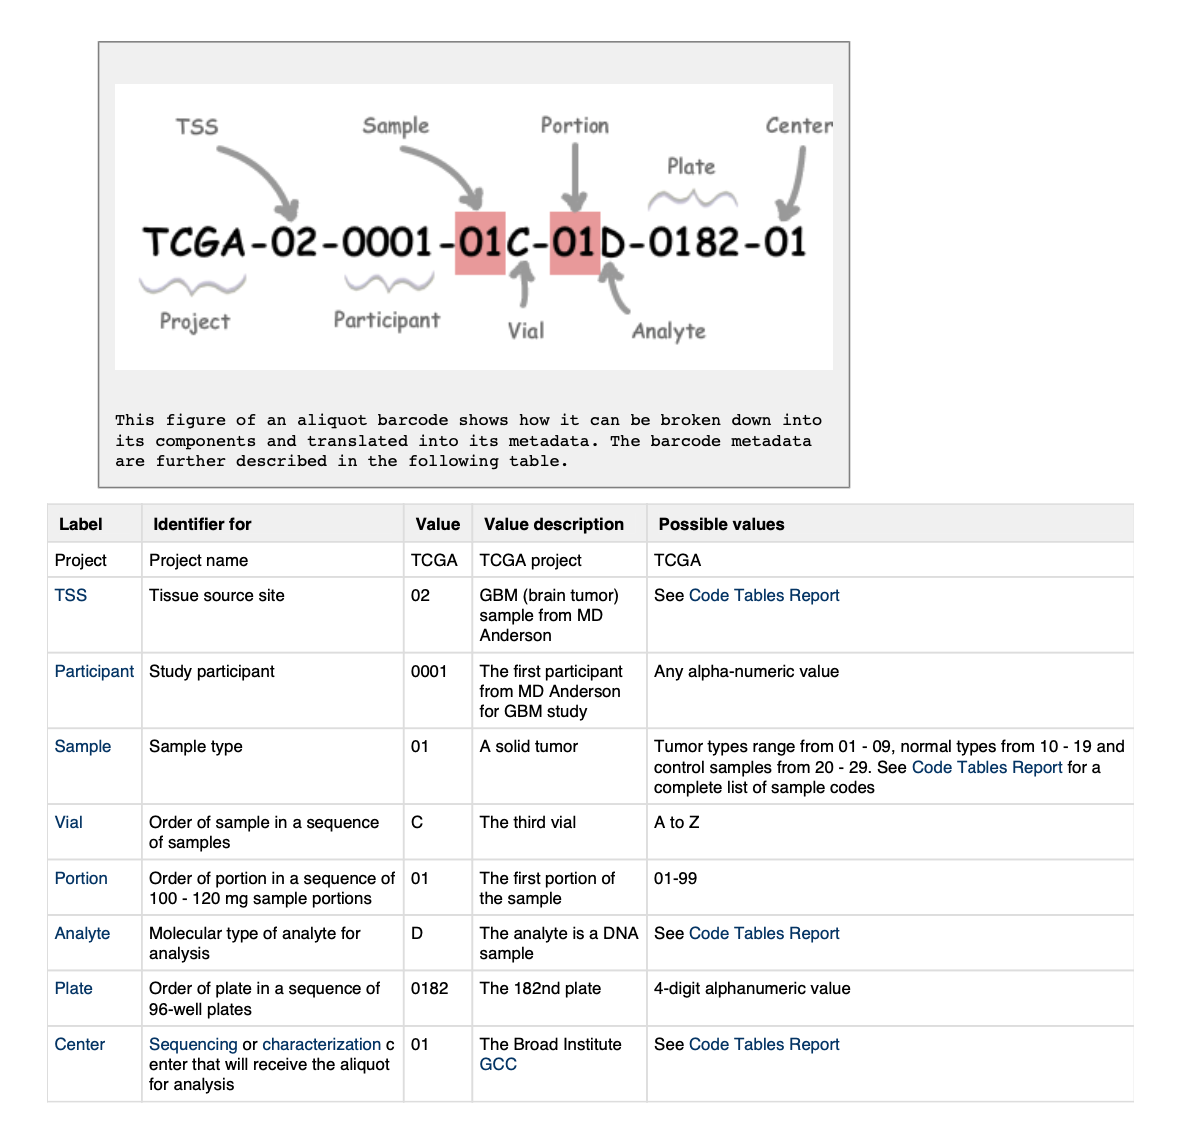

In [13]:
#The TCGA ID of column zero is made up of the following portions: 
from IPython.display import Image
Image("./TCGA_Labels.png")

In [14]:
data_genes_TCGA["PatientID_1"]= data_genes_TCGA.insert(0,'Patient_ID',data_genes_TCGA[0].astype(str).str[0:12])

In [15]:
data_genes_TCGA = data_genes_TCGA.drop("PatientID_1",axis=1)

In [16]:
data_genes_TCGA.head()

,Patient_ID,0,1,2,3,4,5,6,7,8,...,210,211,212,213,214,215,216,217,218,219
0,nan,NaN,Gene Name,YWHAB,YWHAE,YWHAZ,EIF4EBP1,EIF4EBP1,EIF4EBP1,EIF4EBP1,...,CHEK1,COG3,GUSP4,ERCC5,IGFR1,IRF1,JAK2,CDKN2A,PTPN11,CDK1
1,nan,NaN,Sample REF,14-3-3_beta-R-V,14-3-3_epsilon-M-C,14-3-3_zeta-R-V,4E-BP1-R-V,4E-BP1_pS65-R-V,4E-BP1_pT37_T46-R-V,4E-BP1_pT70-R-V,...,Chk1_pS296-R-V,COG3-R-V,DUSP4-R-V,ERCC5-R-C,IGF1R_pY1135_Y1136-R-V,IRF-1-R-C,Jak2-R-V,p16_INK4a-R-V,SHP-2_pY542-R-C,CDK1_pY15-R-C
2,TCGA-2G-AAHC,TCGA-2G-AAHC-01A-21-A45Q-20.P,027D22A3-FA13-4BAE-A6BB-476DE1F79836,-0.09826602075,0.21928706725,0.17231290575,0.13939115525,0.14927421725,0.34855875925,-0.00203256375000005,...,-0.09925312725,0.07781126475,-0.24677301475,0.0865360372499999,-0.14182040175,0.25063490475,0.47252263175,-0.26289499425,-0.21521300825,-0.35232106475
3,TCGA-2G-AALZ,TCGA-2G-AALZ-01A-21-A45P-20.P,044D0CB8-2F15-42AB-9CFC-2BCC918CE4D0,-0.0607450357500001,-0.10418710575,-0.0692476002499999,-0.66888829375,-0.31116245875,-0.11998702675,-0.20017954375,...,-0.06409499925,-0.02929833125,-0.32691142175,0.10976865025,0.16291171025,-0.08356639225,-0.23910209125,0.47783645875,0.22743716675,-0.43563692375
4,TCGA-XE-AANI,TCGA-XE-AANI-01A-21-A45P-20.P,0476AADE-DB39-4507-B3CA-D2B3991C1EAF,0.10141270025,-0.03490767775,0.05237900175,-0.31303576375,0.14739165125,0.41021896925,0.0938120312499999,...,-0.09149730525,0.11580303375,0.0997479482499995,-0.01485904475,0.09265968825,-0.12077305325,0.12746740575,-0.0454944292499999,0.48208536075,0.14425330325


In [17]:
#Time to Merge in the Patient Data: 
Patient_Info = pd.read_csv("./metadata/testicular/nationwidechildrens.org_clinical_patient_tgct.txt",
                                  sep="\t",header=None)
Patient_Info = Patient_Info.drop([0,2],axis=0)
Patient_Info = Patient_Info.drop([0,2,3,4,7],axis=1)
Patient_Info = Patient_Info [[1,5,6]] #This is choosing the features to add from the metadata. Change if needed. 

Patient_Info.shape


(135, 3)

In [18]:
data_genes_TCGA_patient =  pd.merge(Patient_Info, data_genes_TCGA, right_on="Patient_ID", left_on=1,how='right')
data_genes_TCGA_patient = data_genes_TCGA_patient.drop([1],axis=1)

In [19]:
data_genes_TCGA_patient.shape

(124, 224)

In [20]:
index = np.arange(start=0, stop=107, step=1)
index2 = [107,108]
index3 = np.arange(109,124,1)
indexi = np.concatenate((np.concatenate((index2, index)),index3))

data_genes_TCGA_patient = data_genes_TCGA_patient.reindex(indexi) 


In [21]:
data_genes_TCGA_patient = data_genes_TCGA_patient.reset_index()
data_genes_TCGA_patient.columns = range(data_genes_TCGA_patient.shape[1])
data_genes_TCGA_patient.head()

,0,1,2,3,4,5,6,7,8,9,...,215,216,217,218,219,220,221,222,223,224
0,107,NaN,NaN,NaN,nan,NaN,Gene Name,YWHAB,YWHAE,YWHAZ,...,CHEK1,COG3,GUSP4,ERCC5,IGFR1,IRF1,JAK2,CDKN2A,PTPN11,CDK1
1,108,NaN,NaN,NaN,nan,NaN,Sample REF,14-3-3_beta-R-V,14-3-3_epsilon-M-C,14-3-3_zeta-R-V,...,Chk1_pS296-R-V,COG3-R-V,DUSP4-R-V,ERCC5-R-C,IGF1R_pY1135_Y1136-R-V,IRF-1-R-C,Jak2-R-V,p16_INK4a-R-V,SHP-2_pY542-R-C,CDK1_pY15-R-C
2,0,TCGA-2G-AAEW,WHITE,NOT HISPANIC OR LATINO,TCGA-2G-AAEW,TCGA-2G-AAEW-01A-21-A45P-20.P,6A193988-A18D-4D18-914F-763613095313,0.00723727525000006,0.17108031025,0.02681046475,...,0.0800928317499999,-0.28908724425,-0.35243072675,-0.0580790527500001,-0.17769509775,-0.01040692825,0.27357020775,-0.30725466725,-0.27246927925,0.0516381562500001
3,1,TCGA-2G-AAEX,WHITE,NOT HISPANIC OR LATINO,TCGA-2G-AAEX,TCGA-2G-AAEX-01A-21-A45P-20.P,F7B402D0-EA57-4EF4-B685-BD9B1E763BB1,-0.0228724002499999,-0.0135119512499999,0.0714086022500001,...,0.0392209742500002,0.0070381522500001,-0.000397927250000096,0.10194073875,-0.10780766725,0.000397927250000069,0.20384876625,0.14295990525,-0.35432554075,-0.11833798825
4,2,TCGA-2G-AAF1,ASIAN,NOT HISPANIC OR LATINO,TCGA-2G-AAF1,TCGA-2G-AAF1-01A-21-A45P-20.P,519C1C72-9BC5-46CE-90A9-07FAC96049F2,-0.05047927175,0.0611196392500001,-0.12185729125,...,-0.00837370124999992,9.20687500000072e-05,-0.17978097475,0.06084878825,0.01051641625,-0.04558900325,0.11982208375,-0.0116358882499998,-0.10584633625,0.25487037625


In [22]:
data_genes_TCGA_patient = data_genes_TCGA_patient.drop([0,1],axis=1)
data_genes_TCGA_patient.head()

,2,3,4,5,6,7,8,9,10,11,...,215,216,217,218,219,220,221,222,223,224
0,NaN,NaN,nan,NaN,Gene Name,YWHAB,YWHAE,YWHAZ,EIF4EBP1,EIF4EBP1,...,CHEK1,COG3,GUSP4,ERCC5,IGFR1,IRF1,JAK2,CDKN2A,PTPN11,CDK1
1,NaN,NaN,nan,NaN,Sample REF,14-3-3_beta-R-V,14-3-3_epsilon-M-C,14-3-3_zeta-R-V,4E-BP1-R-V,4E-BP1_pS65-R-V,...,Chk1_pS296-R-V,COG3-R-V,DUSP4-R-V,ERCC5-R-C,IGF1R_pY1135_Y1136-R-V,IRF-1-R-C,Jak2-R-V,p16_INK4a-R-V,SHP-2_pY542-R-C,CDK1_pY15-R-C
2,WHITE,NOT HISPANIC OR LATINO,TCGA-2G-AAEW,TCGA-2G-AAEW-01A-21-A45P-20.P,6A193988-A18D-4D18-914F-763613095313,0.00723727525000006,0.17108031025,0.02681046475,0.18589264925,-0.06596049875,...,0.0800928317499999,-0.28908724425,-0.35243072675,-0.0580790527500001,-0.17769509775,-0.01040692825,0.27357020775,-0.30725466725,-0.27246927925,0.0516381562500001
3,WHITE,NOT HISPANIC OR LATINO,TCGA-2G-AAEX,TCGA-2G-AAEX-01A-21-A45P-20.P,F7B402D0-EA57-4EF4-B685-BD9B1E763BB1,-0.0228724002499999,-0.0135119512499999,0.0714086022500001,0.00648171175000012,-0.16481189025,...,0.0392209742500002,0.0070381522500001,-0.000397927250000096,0.10194073875,-0.10780766725,0.000397927250000069,0.20384876625,0.14295990525,-0.35432554075,-0.11833798825
4,ASIAN,NOT HISPANIC OR LATINO,TCGA-2G-AAF1,TCGA-2G-AAF1-01A-21-A45P-20.P,519C1C72-9BC5-46CE-90A9-07FAC96049F2,-0.05047927175,0.0611196392500001,-0.12185729125,0.19421705825,-0.05677895775,...,-0.00837370124999992,9.20687500000072e-05,-0.17978097475,0.06084878825,0.01051641625,-0.04558900325,0.11982208375,-0.0116358882499998,-0.10584633625,0.25487037625


In [23]:
#data_genes_TCGA_patient.isnull().sum(axis = 0)
#It appears there are 17 patients for which there is no recorded metadata

In [24]:
#This data is ready to go: if i need to search for more features about the patient population I can just 
#Add those as necessary. See above. 

# Cervical Cancer Data Preperation: 

In [25]:
#Need to get this data isolated in the correct form: 

In [26]:
#How much patient data do we have? 
folder = "./cervical_cancer/"
onlyfiles = [f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f))]
print("Working with {0} Files".format(len(onlyfiles)))

Working with 173 Files


In [27]:
#Explore one data entry
data = pd.read_csv(folder + onlyfiles[1], sep="\t",header=None)
data.columns = ["Protein", "Protein_Expression"]
data.head()

,Protein,Protein_Expression
0,Sample REF,030704AA-5162-44EE-B68B-7D35FB6DD2A0
1,Composite Element REF,Protein Expression
2,14-3-3_beta-R-V,-0.055507246
3,14-3-3_epsilon-M-C,-0.0786593780000001
4,14-3-3_zeta-R-V,0.013909944


In [28]:
counter = 0
for names in onlyfiles: 
    if names == '.DS_Store':
        print("bad")
    else: 
        new_data = pd.read_csv(folder + names, sep="\t",header=None)
        new_data.columns = ["Protein", "Protein_Expression"]
        data= data.merge(new_data,left_on='Protein',right_on="Protein")
    counter = counter +1   

print(str(counter))
print("The shape of the data frame is: " + str(data.shape))

173
The shape of the data frame is: (221, 175)


In [29]:
data = data.drop(1,axis=0)
data = data.T
data.head()

,0,2,3,4,5,6,7,8,9,10,...,211,212,213,214,215,216,217,218,219,220
Protein,Sample REF,14-3-3_beta-R-V,14-3-3_epsilon-M-C,14-3-3_zeta-R-V,4E-BP1-R-V,4E-BP1_pS65-R-V,4E-BP1_pT37_T46-R-V,4E-BP1_pT70-R-V,53BP1-R-E,A-Raf_pS299-R-C,...,Chk1_pS296-R-V,COG3-R-V,DUSP4-R-V,ERCC5-R-C,IGF1R_pY1135_Y1136-R-V,IRF-1-R-C,Jak2-R-V,p16_INK4a-R-V,SHP-2_pY542-R-C,CDK1_pY15-R-C
Protein_Expression_x,030704AA-5162-44EE-B68B-7D35FB6DD2A0,-0.055507246,-0.0786593780000001,0.013909944,-0.261288397,0.22634436,0.353112503,-0.0190303000000001,0.229888185,-0.308750791,...,0.0806773139999999,-0.041731682,1.743654452,-0.00243608100000003,0.0699366690000001,-0.032784028,-0.095137337,0.045784611,0.689959485,0.227227594
Protein_Expression_y,0095AB4C-70E1-460B-AFEB-74AAB65D1E95,0.12398547,0.0501820559999999,0.253687665,0.39087208,-0.171759452,-0.013397862,0.378657211,0.128511922,0.179061865,...,-0.082511531,0.109371963,0.848677873,0.343440847,-0.0251019089999999,-0.40926965,-0.2717314,-0.194390359,-0.207426776,0.127464476
Protein_Expression_x,030704AA-5162-44EE-B68B-7D35FB6DD2A0,-0.055507246,-0.0786593780000001,0.013909944,-0.261288397,0.22634436,0.353112503,-0.0190303000000001,0.229888185,-0.308750791,...,0.0806773139999999,-0.041731682,1.743654452,-0.00243608100000003,0.0699366690000001,-0.032784028,-0.095137337,0.045784611,0.689959485,0.227227594
Protein_Expression_y,03EE5C70-AD05-49F8-83F9-AB7C4A1F323A,-0.00558458799999995,-0.175859711,0.000265898999999958,-0.051041743,0.010245138,0.226877082,0.156724901,0.520657379,0,...,-0.177242095,0.309519322,0.0410044869999999,-0.00419273600000003,-0.149116117,0.101864104,0.190240479,-1.302524294,-0.029672575,-0.055618035


In [30]:
protein_annotations = pd.read_csv("./metadata/cervical/mdanderson.org_CESC.MDA_RPPA_Core.antibody_annotation.txt", sep="\t",header=None)
protein_annotations = protein_annotations.drop(protein_annotations.columns[[1,3,4,5,6,7,8]],axis = 1)
protein_annotations = protein_annotations.T
protein_annotations.head()

,0,1,2,3,4,5,6,7,8,9,...,210,211,212,213,214,215,216,217,218,219
0,Gene Name,YWHAB,YWHAE,YWHAZ,EIF4EBP1,EIF4EBP1,EIF4EBP1,EIF4EBP1,TP53BP1,ARAF,...,CHEK1,COG3,GUSP4,ERCC5,IGFR1,IRF1,JAK2,CDKN2A,PTPN11,CDK1
2,Sample REF,14-3-3_beta-R-V,14-3-3_epsilon-M-C,14-3-3_zeta-R-V,4E-BP1-R-V,4E-BP1_pS65-R-V,4E-BP1_pT37_T46-R-V,4E-BP1_pT70-R-V,53BP1-R-E,A-Raf_pS299-R-C,...,Chk1_pS296-R-V,COG3-R-V,DUSP4-R-V,ERCC5-R-C,IGF1R_pY1135_Y1136-R-V,IRF-1-R-C,Jak2-R-V,p16_INK4a-R-V,SHP-2_pY542-R-C,CDK1_pY15-R-C


In [31]:
data_with_genes =  pd.merge(protein_annotations.T, data.T, left_on=2, right_on='Protein')
data_with_genes = data_with_genes.T
data_with_genes = data_with_genes.drop("Protein", axis=0)
data_with_genes.head()

,0,1,2,3,4,5,6,7,8,9,...,210,211,212,213,214,215,216,217,218,219
0,Gene Name,YWHAB,YWHAE,YWHAZ,EIF4EBP1,EIF4EBP1,EIF4EBP1,EIF4EBP1,TP53BP1,ARAF,...,CHEK1,COG3,GUSP4,ERCC5,IGFR1,IRF1,JAK2,CDKN2A,PTPN11,CDK1
2,Sample REF,14-3-3_beta-R-V,14-3-3_epsilon-M-C,14-3-3_zeta-R-V,4E-BP1-R-V,4E-BP1_pS65-R-V,4E-BP1_pT37_T46-R-V,4E-BP1_pT70-R-V,53BP1-R-E,A-Raf_pS299-R-C,...,Chk1_pS296-R-V,COG3-R-V,DUSP4-R-V,ERCC5-R-C,IGF1R_pY1135_Y1136-R-V,IRF-1-R-C,Jak2-R-V,p16_INK4a-R-V,SHP-2_pY542-R-C,CDK1_pY15-R-C
Protein_Expression_x,030704AA-5162-44EE-B68B-7D35FB6DD2A0,-0.055507246,-0.0786593780000001,0.013909944,-0.261288397,0.22634436,0.353112503,-0.0190303000000001,0.229888185,-0.308750791,...,0.0806773139999999,-0.041731682,1.743654452,-0.00243608100000003,0.0699366690000001,-0.032784028,-0.095137337,0.045784611,0.689959485,0.227227594
Protein_Expression_y,0095AB4C-70E1-460B-AFEB-74AAB65D1E95,0.12398547,0.0501820559999999,0.253687665,0.39087208,-0.171759452,-0.013397862,0.378657211,0.128511922,0.179061865,...,-0.082511531,0.109371963,0.848677873,0.343440847,-0.0251019089999999,-0.40926965,-0.2717314,-0.194390359,-0.207426776,0.127464476
Protein_Expression_x,030704AA-5162-44EE-B68B-7D35FB6DD2A0,-0.055507246,-0.0786593780000001,0.013909944,-0.261288397,0.22634436,0.353112503,-0.0190303000000001,0.229888185,-0.308750791,...,0.0806773139999999,-0.041731682,1.743654452,-0.00243608100000003,0.0699366690000001,-0.032784028,-0.095137337,0.045784611,0.689959485,0.227227594


In [32]:
TCGA_Annot = pd.read_csv("./metadata/cervical/mdanderson.org_CESC.MDA_RPPA_Core.sdrf.txt",
                                  sep="\t",header=None)
TCGA_Annot = TCGA_Annot[[4,9]]
TCGA_Annot.head()

,4,9
0,Sample Name,Extract Name
1,84C57E10-A656-4563-8F7A-71CD0ECD84B0,TCGA-EK-A2RD-01A-21-A40H-20.P
2,030704AA-5162-44EE-B68B-7D35FB6DD2A0,TCGA-MA-AA43-01A-21-A40H-20.P
3,BCB3CB2B-4807-4B75-BEBA-8B33C4F18C18,TCGA-LP-A7HU-01A-21-A40H-20.P
4,D8E06BD2-30E2-48A5-B1CD-4F056E6CB193,TCGA-WL-A834-01A-21-A40H-20.P


In [33]:
data_genes_TCGA =  pd.merge(data_with_genes,TCGA_Annot , left_on=0, right_on=4,how='left')
data_genes_TCGA = data_genes_TCGA.drop_duplicates()
data_genes_TCGA.head()

,0,1,2,3,4_x,5,6,7,8,9_x,...,212,213,214,215,216,217,218,219,4_y,9_y
0,Gene Name,YWHAB,YWHAE,YWHAZ,EIF4EBP1,EIF4EBP1,EIF4EBP1,EIF4EBP1,TP53BP1,ARAF,...,GUSP4,ERCC5,IGFR1,IRF1,JAK2,CDKN2A,PTPN11,CDK1,NaN,NaN
1,Sample REF,14-3-3_beta-R-V,14-3-3_epsilon-M-C,14-3-3_zeta-R-V,4E-BP1-R-V,4E-BP1_pS65-R-V,4E-BP1_pT37_T46-R-V,4E-BP1_pT70-R-V,53BP1-R-E,A-Raf_pS299-R-C,...,DUSP4-R-V,ERCC5-R-C,IGF1R_pY1135_Y1136-R-V,IRF-1-R-C,Jak2-R-V,p16_INK4a-R-V,SHP-2_pY542-R-C,CDK1_pY15-R-C,NaN,NaN
2,030704AA-5162-44EE-B68B-7D35FB6DD2A0,-0.055507246,-0.0786593780000001,0.013909944,-0.261288397,0.22634436,0.353112503,-0.0190303000000001,0.229888185,-0.308750791,...,1.743654452,-0.00243608100000003,0.0699366690000001,-0.032784028,-0.095137337,0.045784611,0.689959485,0.227227594,030704AA-5162-44EE-B68B-7D35FB6DD2A0,TCGA-MA-AA43-01A-21-A40H-20.P
221,0095AB4C-70E1-460B-AFEB-74AAB65D1E95,0.12398547,0.0501820559999999,0.253687665,0.39087208,-0.171759452,-0.013397862,0.378657211,0.128511922,0.179061865,...,0.848677873,0.343440847,-0.0251019089999999,-0.40926965,-0.2717314,-0.194390359,-0.207426776,0.127464476,0095AB4C-70E1-460B-AFEB-74AAB65D1E95,TCGA-Q1-A73P-01A-21-A40I-20.P
659,03EE5C70-AD05-49F8-83F9-AB7C4A1F323A,-0.00558458799999995,-0.175859711,0.000265898999999958,-0.051041743,0.010245138,0.226877082,0.156724901,0.520657379,0,...,0.0410044869999999,-0.00419273600000003,-0.149116117,0.101864104,0.190240479,-1.302524294,-0.029672575,-0.055618035,03EE5C70-AD05-49F8-83F9-AB7C4A1F323A,TCGA-FU-A57G-01A-21-A40H-20.P


In [34]:
#Get all column names
cols = list(data_genes_TCGA)
# move the column to head of list using index, pop and insert
cols.insert(0, cols.pop(cols.index('9_y')))
# use ix to reorder
data_genes_TCGA = data_genes_TCGA.loc[:, cols]
data_genes_TCGA = data_genes_TCGA.drop("4_y", axis=1)

In [35]:
#Final Reorganization Steps
data_genes_TCGA = data_genes_TCGA.reset_index()
data_genes_TCGA = data_genes_TCGA.drop(data_genes_TCGA.columns[[0]],axis = 1)
data_genes_TCGA.columns = range(data_genes_TCGA.shape[1])
data_genes_TCGA.head()

,0,1,2,3,4,5,6,7,8,9,...,211,212,213,214,215,216,217,218,219,220
0,NaN,Gene Name,YWHAB,YWHAE,YWHAZ,EIF4EBP1,EIF4EBP1,EIF4EBP1,EIF4EBP1,TP53BP1,...,CHEK1,COG3,GUSP4,ERCC5,IGFR1,IRF1,JAK2,CDKN2A,PTPN11,CDK1
1,NaN,Sample REF,14-3-3_beta-R-V,14-3-3_epsilon-M-C,14-3-3_zeta-R-V,4E-BP1-R-V,4E-BP1_pS65-R-V,4E-BP1_pT37_T46-R-V,4E-BP1_pT70-R-V,53BP1-R-E,...,Chk1_pS296-R-V,COG3-R-V,DUSP4-R-V,ERCC5-R-C,IGF1R_pY1135_Y1136-R-V,IRF-1-R-C,Jak2-R-V,p16_INK4a-R-V,SHP-2_pY542-R-C,CDK1_pY15-R-C
2,TCGA-MA-AA43-01A-21-A40H-20.P,030704AA-5162-44EE-B68B-7D35FB6DD2A0,-0.055507246,-0.0786593780000001,0.013909944,-0.261288397,0.22634436,0.353112503,-0.0190303000000001,0.229888185,...,0.0806773139999999,-0.041731682,1.743654452,-0.00243608100000003,0.0699366690000001,-0.032784028,-0.095137337,0.045784611,0.689959485,0.227227594
3,TCGA-Q1-A73P-01A-21-A40I-20.P,0095AB4C-70E1-460B-AFEB-74AAB65D1E95,0.12398547,0.0501820559999999,0.253687665,0.39087208,-0.171759452,-0.013397862,0.378657211,0.128511922,...,-0.082511531,0.109371963,0.848677873,0.343440847,-0.0251019089999999,-0.40926965,-0.2717314,-0.194390359,-0.207426776,0.127464476
4,TCGA-FU-A57G-01A-21-A40H-20.P,03EE5C70-AD05-49F8-83F9-AB7C4A1F323A,-0.00558458799999995,-0.175859711,0.000265898999999958,-0.051041743,0.010245138,0.226877082,0.156724901,0.520657379,...,-0.177242095,0.309519322,0.0410044869999999,-0.00419273600000003,-0.149116117,0.101864104,0.190240479,-1.302524294,-0.029672575,-0.055618035


In [36]:
data_genes_TCGA["PatientID_1"]= data_genes_TCGA.insert(0,'Patient_ID',data_genes_TCGA[0].astype(str).str[0:12])

In [37]:
data_genes_TCGA = data_genes_TCGA.drop("PatientID_1",axis=1)

In [38]:
data_genes_TCGA.head()

,Patient_ID,0,1,2,3,4,5,6,7,8,...,211,212,213,214,215,216,217,218,219,220
0,nan,NaN,Gene Name,YWHAB,YWHAE,YWHAZ,EIF4EBP1,EIF4EBP1,EIF4EBP1,EIF4EBP1,...,CHEK1,COG3,GUSP4,ERCC5,IGFR1,IRF1,JAK2,CDKN2A,PTPN11,CDK1
1,nan,NaN,Sample REF,14-3-3_beta-R-V,14-3-3_epsilon-M-C,14-3-3_zeta-R-V,4E-BP1-R-V,4E-BP1_pS65-R-V,4E-BP1_pT37_T46-R-V,4E-BP1_pT70-R-V,...,Chk1_pS296-R-V,COG3-R-V,DUSP4-R-V,ERCC5-R-C,IGF1R_pY1135_Y1136-R-V,IRF-1-R-C,Jak2-R-V,p16_INK4a-R-V,SHP-2_pY542-R-C,CDK1_pY15-R-C
2,TCGA-MA-AA43,TCGA-MA-AA43-01A-21-A40H-20.P,030704AA-5162-44EE-B68B-7D35FB6DD2A0,-0.055507246,-0.0786593780000001,0.013909944,-0.261288397,0.22634436,0.353112503,-0.0190303000000001,...,0.0806773139999999,-0.041731682,1.743654452,-0.00243608100000003,0.0699366690000001,-0.032784028,-0.095137337,0.045784611,0.689959485,0.227227594
3,TCGA-Q1-A73P,TCGA-Q1-A73P-01A-21-A40I-20.P,0095AB4C-70E1-460B-AFEB-74AAB65D1E95,0.12398547,0.0501820559999999,0.253687665,0.39087208,-0.171759452,-0.013397862,0.378657211,...,-0.082511531,0.109371963,0.848677873,0.343440847,-0.0251019089999999,-0.40926965,-0.2717314,-0.194390359,-0.207426776,0.127464476
4,TCGA-FU-A57G,TCGA-FU-A57G-01A-21-A40H-20.P,03EE5C70-AD05-49F8-83F9-AB7C4A1F323A,-0.00558458799999995,-0.175859711,0.000265898999999958,-0.051041743,0.010245138,0.226877082,0.156724901,...,-0.177242095,0.309519322,0.0410044869999999,-0.00419273600000003,-0.149116117,0.101864104,0.190240479,-1.302524294,-0.029672575,-0.055618035


In [39]:
#Time to Merge in the Patient Data: 
Patient_Info = pd.read_csv("./metadata/cervical/nationwidechildrens.org_clinical_patient_cesc.txt",
                                  sep="\t",header=None)
Patient_Info = Patient_Info.drop([0,2],axis=0)
Patient_Info = Patient_Info.drop([0,2,3,4,7],axis=1)
Patient_Info = Patient_Info [[1,5,6]] #This is choosing the features to add from the metadata. Change if needed. 

Patient_Info.shape


(308, 3)

In [40]:
data_genes_TCGA_patient =  pd.merge(Patient_Info, data_genes_TCGA, right_on="Patient_ID", left_on=1,how='right')
data_genes_TCGA_patient = data_genes_TCGA_patient.drop([1],axis=1)

In [41]:
data_genes_TCGA_patient.shape

(175, 225)

In [42]:
index = np.arange(start=0, stop=107, step=1)
index2 = [107,108]
index3 = np.arange(109,124,1)
indexi = np.concatenate((np.concatenate((index2, index)),index3))

data_genes_TCGA_patient = data_genes_TCGA_patient.reindex(indexi) 


In [43]:
data_genes_TCGA_patient = data_genes_TCGA_patient.reset_index()
data_genes_TCGA_patient.columns = range(data_genes_TCGA_patient.shape[1])
data_genes_TCGA_patient.head()

,0,1,2,3,4,5,6,7,8,9,...,216,217,218,219,220,221,222,223,224,225
0,107,TCGA-FU-A3TX,-28825,FEMALE,TCGA-FU-A3TX,TCGA-FU-A3TX-01A-21-A40I-20.P,ADB7A8CB-073E-42FE-8219-650EDE7B72DF,-0.151344075,-0.040175851,-0.624649161,...,-0.101410977,-0.209626116,-0.231250754,-0.387177603,-0.0483396779999999,0.043371969,0.409954546,0.537507151,-0.409821176,-0.067697594
1,108,TCGA-FU-A40J,-14182,FEMALE,TCGA-FU-A40J,TCGA-FU-A40J-01A-21-A40I-20.P,70D677F9-4C07-4C10-BC21-D75784B8AFA4,0.197798343,0.0387886530000001,2.105834839,...,0.632681158,-1.239147495,0.784866188,0.734689049,0.481869534,0.998886383,-0.0420010789999996,2.139526168,-0.413020224,-0.193229382
2,0,TCGA-2W-A8YY,-18886,FEMALE,TCGA-2W-A8YY,TCGA-2W-A8YY-01A-21-A40H-20.P,C29F674F-5572-4F11-9AA4-8D7F7464BE44,0.879446109,0.283619534,0.795979302,...,0.838128249,-1.204358576,0.98026583,0.576061552,0.742962649,0.280943847,-0.427620815,-1.555734871,-0.519747159,-0.0442280939999999
3,1,TCGA-4J-AA1J,-11611,FEMALE,TCGA-4J-AA1J,TCGA-4J-AA1J-01A-11-A40H-20.P,4EE077A4-25B8-4C6B-B0D3-06301827E402,0.153368761,-0.11355863,0.258062906,...,0.0805494759999999,-0.253046523,0.942242258,-0.114616487,0.016992148,-0.434624842,-0.144857264,0.507210703,-0.140891075,-0.499351567
4,2,TCGA-C5-A0TN,-7760,FEMALE,TCGA-C5-A0TN,TCGA-C5-A0TN-01A-11-A40H-20.P,40F6A1D0-844F-412D-94CF-5F5BA0FD62E5,0.123183488,-0.03426341,0.313855226,...,0.263113133,-0.733918136,0.745076229,0.0438304549999999,0.416370827,-0.130751658,-0.765478521,-0.140173625,-0.269787991,-0.582786817


In [44]:
data_genes_TCGA_patient = data_genes_TCGA_patient.drop([0,1],axis=1)
data_genes_TCGA_patient.head()

,2,3,4,5,6,7,8,9,10,11,...,216,217,218,219,220,221,222,223,224,225
0,-28825,FEMALE,TCGA-FU-A3TX,TCGA-FU-A3TX-01A-21-A40I-20.P,ADB7A8CB-073E-42FE-8219-650EDE7B72DF,-0.151344075,-0.040175851,-0.624649161,0.233943758,-0.221687548,...,-0.101410977,-0.209626116,-0.231250754,-0.387177603,-0.0483396779999999,0.043371969,0.409954546,0.537507151,-0.409821176,-0.067697594
1,-14182,FEMALE,TCGA-FU-A40J,TCGA-FU-A40J-01A-21-A40I-20.P,70D677F9-4C07-4C10-BC21-D75784B8AFA4,0.197798343,0.0387886530000001,2.105834839,1.117392685,-0.1699743,...,0.632681158,-1.239147495,0.784866188,0.734689049,0.481869534,0.998886383,-0.0420010789999996,2.139526168,-0.413020224,-0.193229382
2,-18886,FEMALE,TCGA-2W-A8YY,TCGA-2W-A8YY-01A-21-A40H-20.P,C29F674F-5572-4F11-9AA4-8D7F7464BE44,0.879446109,0.283619534,0.795979302,0.151648422,-0.140376728,...,0.838128249,-1.204358576,0.98026583,0.576061552,0.742962649,0.280943847,-0.427620815,-1.555734871,-0.519747159,-0.0442280939999999
3,-11611,FEMALE,TCGA-4J-AA1J,TCGA-4J-AA1J-01A-11-A40H-20.P,4EE077A4-25B8-4C6B-B0D3-06301827E402,0.153368761,-0.11355863,0.258062906,0.311539321,-0.0582218270000001,...,0.0805494759999999,-0.253046523,0.942242258,-0.114616487,0.016992148,-0.434624842,-0.144857264,0.507210703,-0.140891075,-0.499351567
4,-7760,FEMALE,TCGA-C5-A0TN,TCGA-C5-A0TN-01A-11-A40H-20.P,40F6A1D0-844F-412D-94CF-5F5BA0FD62E5,0.123183488,-0.03426341,0.313855226,-0.423570269,0.200332115,...,0.263113133,-0.733918136,0.745076229,0.0438304549999999,0.416370827,-0.130751658,-0.765478521,-0.140173625,-0.269787991,-0.582786817


# This is me overthinking stufff

In [161]:
data = data.drop(1,axis=0)
data.rename(columns={'Protein':'one'}, 
                 index={0:'zero',1:'one'}, 
                 inplace=True)

new_header = data.iloc[0] #grab the first row for the header
row = data['one']
new = data[0:] #take the data less the header row
new.columns = new_header #set the header row as the df header
new = new.set_index(row)
new = new.drop(columns = "Sample REF")
new = new.drop("Sample REF",axis=0)

new.head()

KeyError: '[1] not found in axis'

In [ ]:
new = new.T
new.head()

In [ ]:
new.rename(columns={ new.columns[0]: "Patient" })